Implementation of Linear Regression algorithm

Import the necessary packages like numpy,pandas,matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the dataset using pandas package

In [3]:
data=pd.read_csv('Medical Price Dataset.csv') 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


check the size of dataset

In [4]:
data.shape

(1338, 7)

check for datatype of the dataset

In [5]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Now convert the object type of sex,smoker,region(features) to integer type

In [6]:
varlist=['sex','smoker','region']
def binary_map(x):
    return x.map({'male':1,'female':0,'yes':1,'no':0,'southwest':1,'southeast':2,'northwest':3,'northeast':4})
data[varlist]=data[varlist].apply(binary_map)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520


Now check how well the features are correlated to the target variable i.e.charges

In [7]:
data.corr()['charges']

age         0.299008
sex         0.057292
bmi         0.198341
children    0.067998
smoker      0.787251
region      0.006208
charges     1.000000
Name: charges, dtype: float64

Now drop the features that has very less correlation with the target

In [8]:
price=data['charges']
data=data.drop(['charges','sex','children','region'],axis=1)
data['price']=price
data

,age,bmi,smoker,price
0,19,27.900,1,16884.92400
1,18,33.770,0,1725.55230
2,28,33.000,0,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,0,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


Now check for the null values in the updated data

In [9]:
data.isnull().sum()

age       0
bmi       0
smoker    0
price     0
dtype: int64

Describe the data

In [10]:
data.describe()

,age,bmi,smoker,price
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,0.204783,13270.422265
std,14.049960,6.098187,0.403694,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,0.000000,9382.033000
75%,51.000000,34.693750,0.000000,16639.912515
max,64.000000,53.130000,1.000000,63770.428010


Plot the features over target variable i.e.price

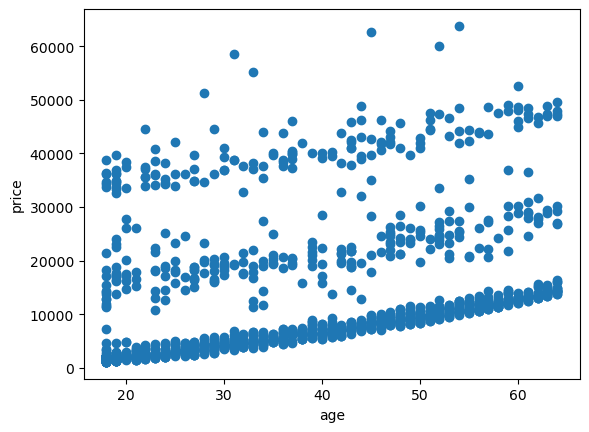

In [11]:
plt.scatter(data['age'],data['price'])
plt.xlabel("age")
plt.ylabel("price")
plt.show()

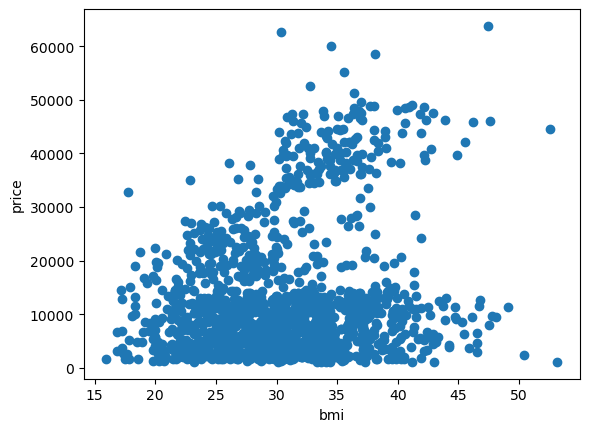

In [12]:
plt.scatter(data['bmi'],data['price'])
plt.xlabel("bmi")
plt.ylabel("price")
plt.show()

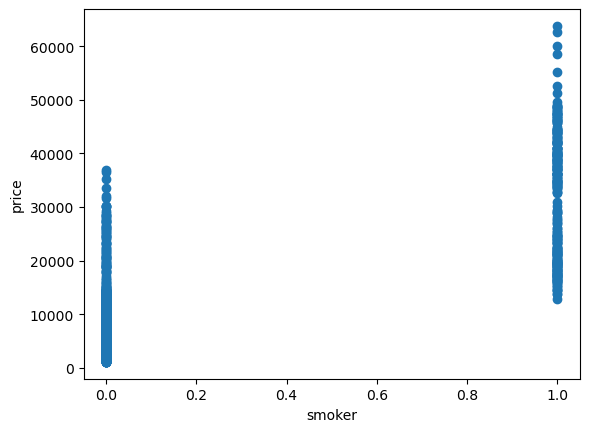

In [13]:
plt.scatter(data['smoker'],data['price'])
plt.xlabel("smoker")
plt.ylabel("price")
plt.show()

Now determine the x,y values

In [14]:
x=data[['age','bmi','smoker']].values
y=data['price'].values

Now split the data into train,test using fuctions

In [15]:
def train_test_split(x, y, test_size=0.2, random_state=None):
   
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffling the data
    indices = np.random.permutation(len(x))
    x_shuffled = x[indices]
    y_shuffled = y[indices]
    
    # determining  the number of samples for the test set
    test_samples = int(len(x) * test_size)
    
    # Splitting the data into training and testing sets
    x_train = x_shuffled[:-test_samples]
    y_train = y_shuffled[:-test_samples]
    x_test = x_shuffled[-test_samples:]
    y_test = y_shuffled[-test_samples:]
    
    return x_train, x_test, y_train, y_test

#calling the function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)


Normalize the data in order to stable the data

In [17]:
def normalize_data(x_train):
    # normalizing the input features
    mean = np.mean(x_train, axis=0)
    std = np.std(x_train, axis=0)
    x_train_norm = (x_train - mean) / std
    return x_train_norm

creating Linear regression model using functions of gradient descent techniques

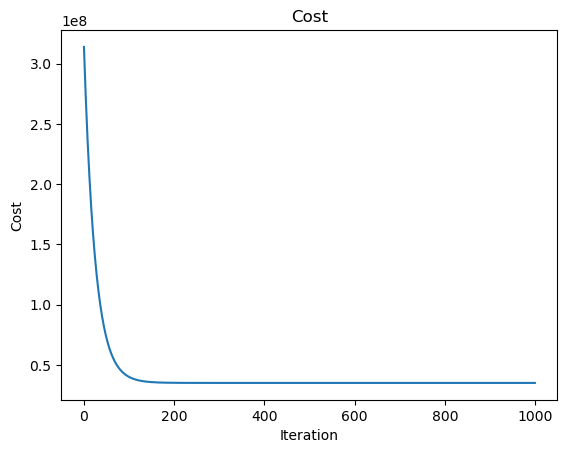

In [18]:
def linear_regression(x_train, y_train, num_iterations=1000, learning_rate=0.01):
    
    # converting input data to NumPy arrays
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    
    # Normalizing the input features
    x_train = normalize_data(x_train)
    
    # Adding bias term(ones)
    ones = np.ones((x_train.shape[0], 1))
    x_train = np.hstack((ones, x_train))
    
    # Initializing the  (weights) with zeros
    num_features = x_train.shape[1]
    weights = np.zeros(num_features)
    
    # empty list to store the costs
    cost_history = []
    
    # Performing gradient descent
    for i in range(num_iterations):
        
        y_pred = np.dot(x_train, weights)  # prediction
        error = y_pred - y_train      # error term
        cost = np.mean(error ** 2)
        cost_history.append(cost)
        gradients = (2 / x_train.shape[0]) * np.dot(x_train.T, error) #gradients for each cost
        weights -= learning_rate * gradients  #weights updation
    #plotting cost over iterations
    plt.plot(cost_history)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title('Cost')
    plt.show()
    
    # Calculate metrics
    y_pred_final = np.dot(x_train, weights)
    mse = np.mean((y_pred_final - y_train) ** 2)
    r_squared = 1 - (np.sum((y_train - y_pred_final) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))
    
    # Return the final weights and metrics
    return weights, mse, r_squared
#calling linear_regression function with  initialized values
weights, mse, r_squared = linear_regression(x_train, y_train, num_iterations=1000, learning_rate=0.01)



r-squared value(ranges from -1 to +1) to determine the effectiveness of the model 

In [19]:
print("R-squared:", r_squared)

R-squared: 0.755882926576765
